In [80]:
# Dados
using CSV              # Gravação/leitura de ficheiros em formato CSV
using DataFrames       # Tabelas
using HTTP             # Cliente HTTP, para download de dados de Yahoo.Finance
using JSON             # Formato de intercâmbio de dados, para download dados Yahoo.Finance
using Dates            # Datas

# Estatistica
using ARCHModels       # Modelos GARCH
using Distributions    # Distribuições de probabilidade
using GLM              # Modelos lineares generalizados
using HypothesisTests  # Testes de hipóteses
using Random           # Simulação de variáveis aleatórias
using Statistics       # Estatística descritiva, inclui cálculo de quantis

# Gráficos
using StatsPlots       # Gráficos 

# Matemática
using Cbc              # Optimização com variáveis discretas
using Ipopt            # Optimização não-linear
using JuMP             # Linguagem de modelização para optimização
using Juniper          # Optimização não-linear com variáveis discretas
using LinearAlgebra    # Álgebra linear

Foi criada uma aplicação em Julia especialmente para a disciplina de Gestão de Riscos Financeiros (GRF), imaginativamente chamada GRF.jl. Para a instalar podemos fazer, 

In [ ]:
import Pkg
Pkg.add(url = https://github.com/ASaragga/GRF.jl)
using GRF

Módulo 1 - Introdução aos Riscos Financeiros

* 1.1 Noção e Tipologia dos Riscos Financeiros
 * 1.1.1. Noção de risco
 * 1.1.2. Tipologia dos riscos financeiros 
* 1.2. Medidas de Risco
 * 1.2.1. Medida de Risco Total: Volatilidade
 * 1.2.2. Medidas de Risco de Perda: Valor-em-Risco e Perda Esperada na Cauda
* 1.3 Determinação do VaR e ETL
 * 1.3.1. Cálculo do VaR por simulação histórica
 * 1.3.2. Cálculo do VaR pelo método analítico
 * 1.3.3. Cálculo do VaR por simulação de Monte-Carlo
 * 1.3.4. Retornos esperados e o cálculo do VaR e ETL
 * 1.3.5. Agregação Temporal
 * 1.3.6. Limitações do VaR e ETL
* 1.4. Testes de Stresse
 * 1.4.1. Análise de sensibilidade
 * 1.4.2. Análise de cenários
* 1.5. Procedimento de *Backtesting*
 * 1.5.1. Teste do Semáforo de Basileia
 * 1.5.2. Teste de Cobertura Incondicional de Kupiec
* 1.6. Regularidades Empíricas de Retornos Financeiros
 * 1.6.1. Caudas pesadas
      * 1.6.1.1. Gráficos QQ
      * 1.6.1.2. Testes de Normalidade
 * 1.6.2. Agrupamentos de volatilidade
     * 1.6.2.1. Médias móveis simples
     * 1.6.2.2. Médias móveis ponderadas exponencialmente
     * 1.6.2.3. Modelos GARCH
     * 1.6.2.4. Volatilidade implícita
 * 1.6.3. Dependência não-linear
* 1.7. A experiência da banca internacional
 * 1.7.1. JP Morgan
 * 1.7.2. Goldman Sachs 
* 1.8. Teoria da Carteira
+ 1.9. Risco Sistemático, Risco Específico e Retorno Esperado

# Prólogo

### Ficheiros de Dados

Os retornos das ações constituintes dos índices (i) *Dow Jones Industrial Average* e (ii) PSI 20, (iii) além de um conjunto adicional de 10 ações do mercado dos EUA, encontram-se disponibilizada nos ficheiros:
* DJ30r.csv - retornos das 30 ações constituintes do índice *Dow Jones Industrial Average* (DJIA) além dos índices DJIA e S\&P500
* PSI20r.csv - retornos das 18 ações constituintes do índice PSI 20 e do próprio índice
* Divr.csv - retornos de 10 outras ações cotadas nos mercados dos EUA (Amazon, Bank of America, Citigroup, Ford, Facebook, Google, Morgan Stanley, Netflix, Pepsi, Tesla)

Os retornos foram calculados para o período entre 01/01/2016 e 31/03/2021. Os ficheiros têm datas na 1ª coluna e os retornos de cada ação nas colunas seguintes. 

Começamos por ler os três ficheiros (os quais se presupõem estar na mesma directoria que o notebook) para tabelas do tipo DataFrame.

In [81]:
DJ30r = CSV.read("DJ30r.csv", DataFrame)
describe(DJ30r)                          # Descreve a tabela com alguns dados estatísticos

33×7 DataFrame
 Row │ variable  mean          min         median       max         nmissing   ⋯
     │ Symbol    Union…        Any         Union…       Any         Int64      ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Data                    2016-01-04               2021-03-31         0   ⋯
   2 │ AAPL      0.00122195    -0.137708   0.000975814  0.113157           0
   3 │ AMGN      0.000435061   -0.100756   0.000602092  0.103438           0
   4 │ AXP       0.000604735   -0.160388   0.0010072    0.197885           0
   5 │ BA        0.000511476   -0.272444   0.000868807  0.217677           0   ⋯
   6 │ CAT       0.00104736    -0.15411    0.000728773  0.0983244          0
   7 │ CRM       0.000753143   -0.173027   0.00110022   0.231468           0
   8 │ CSCO      0.000615807   -0.118615   0.00110023   0.125517           0
   9 │ CVX       0.000289356   -0.250062   0.000477233  0.204904           0   ⋯
  10 │ DD        0.000139511   -0.141677   0.000420223  0.163949           0
  11 │ DIS       0.000470648   -0.139085   0.000121158  0.134639           0
  ⋮  │    ⋮           ⋮            ⋮            ⋮           ⋮          ⋮       ⋱
  24 │ NKE       0.000615737   -0.124053   0.000506729  0.141284           0
  25 │ PG        0.000522539   -0.0914285  0.000719774  0.113409           0   ⋯
  26 │ TRV       0.000307457   -0.233198   0.00106186   0.124783           0
  27 │ UNH       0.000934645   -0.189671   0.000956555  0.120437           0
  28 │ V         0.000787685   -0.145572   0.00168301   0.129647           0
  29 │ VZ        0.000350351   -0.0684981  0.000423818  0.0739953          0   ⋯
  30 │ WBA       -0.000222354  -0.137025   0.000370319  0.118704           0
  31 │ WMT       0.000692425   -0.107399   0.000678528  0.110723           0
  32 │ ^DJI      0.000483364   -0.138418   0.000881299  0.107643           0
  33 │ ^GSPC     0.000503496   -0.127652   0.000711274  0.0896832          0   ⋯
                                                    1 column and 12 rows omitted

In [83]:
PSI20r = CSV.read("PSI20r.csv", DataFrame) 
describe(PSI20r)                  

20×7 DataFrame
 Row │ variable  mean          min         median        max         nmissing  ⋯
     │ Symbol    Union…        Any         Union…        Any         Int64     ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Data                    2016-01-04                2021-03-31         0  ⋯
   2 │ ALTR.LS   0.000499009   -0.146815   0.0           0.123928           0
   3 │ BCP.LS    -0.00124121   -0.164681   -0.00120851   0.173302           0
   4 │ COR.LS    0.000489976   -0.0871943  0.0           0.0891738          0
   5 │ CTT.LS    -0.000484033  -0.244332   0.0           0.109685           0  ⋯
   6 │ EDP.LS    0.000545548   -0.148916   0.000662563   0.0948462          0
   7 │ EDPR.LS   0.00072672    -0.12329    0.000499511   0.0962235          0
   8 │ GALP.LS   9.54129e-5    -0.180511   0.000351953   0.160385           0
   9 │ IBS.LS    -4.47627e-5   -0.258019   0.0           0.223928           0  ⋯
  10 │ JMT.LS    0.000237639   -0.115636   0.0           0.0975988          0
  11 │ EGL.LS    -0.000123888  -0.205614   -0.000581563  0.280056           0
  12 │ NBA.LS    0.000835001   -0.150999   0.0           0.216874           0
  13 │ NOS.LS    -0.000393504  -0.111216   -0.000732622  0.126414           0  ⋯
  14 │ NVG.LS    9.32164e-5    -0.109625   0.000348892   0.0928014          0
  15 │ PHR.LS    -0.00046801   -0.298153   -0.00198228   0.218254           0
  16 │ RAM.LS    0.000501449   -0.204794   0.0           0.158406           0
  17 │ RENE.LS   0.000166303   -0.099866   0.0           0.0641104          0  ⋯
  18 │ SEM.LS    6.17883e-5    -0.105974   -0.000444544  0.250144           0
  19 │ SON.LS    -7.68874e-5   -0.108353   0.0           0.0750788          0
  20 │ PSI20.LS  -3.04515e-5   -0.102671   0.00022239    0.0753239         16
                                                                1 column omitted

In [84]:
Divr = CSV.read("Divr.csv", DataFrame) 
describe(Divr)                  

11×7 DataFrame
 Row │ variable  mean         min         median       max         nmissing  e ⋯
     │ Symbol    Union…       Any         Union…       Any         Int64     D ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Data                   2016-01-04               2021-03-31         0  D ⋯
   2 │ AMZN      0.00115244   -0.082535   0.00145012   0.124131           0  F
   3 │ BAC       0.000708909  -0.167205   0.000835942  0.163786           0  F
   4 │ C         0.000350186  -0.214414   0.000456363  0.165381           0  F
   5 │ F         0.0001004    -0.116674   0.0          0.210596           0  F ⋯
   6 │ FB        0.000783836  -0.210239   0.00117354   0.144286           0  F
   7 │ GOOG      0.000759696  -0.117667   0.00115515   0.0993795          0  F
   8 │ MS        0.000773743  -0.169603   0.000893947  0.180403           0  F
   9 │ NFLX      0.00114961   -0.140714   0.000543585  0.174189           0  F ⋯
  10 │ PEP       0.000380867  -0.121358   0.000697549  0.121657           0  F
  11 │ TSLA      0.00199465   -0.236518   0.00129648   0.181445           0  F
                                                                1 column omitted

Notemos que do total das 61 séries cronológicas existentes nos três ficheiros, apenas o índice PSI 20 tem valores em falta (*missing* = 16 em 1320).

In [85]:
Datas = DJ30r[!,:Data]
JPMorgan = DJ30r[!, :JPM]
PG = DJ30r[!, :PG]
Tesla = Divr[!, :TSLA]

1320-element Vector{Float64}:
 -0.07167193562060005
  8.955369781024233e-5
 -0.019843853441797565
 -0.01559758302993885
 -0.021798596303669673
 -0.015041493197804375
  0.010147992658043942
 -0.04709847762172431
  0.028883401754665437
 -0.005788350890355521
 -0.0013180264436986533
 -0.029847006020351563
  0.006371150531019343
  ⋮
 -0.04486533595853884
  0.036168696812729356
 -0.07184062752478923
  0.0026146540803348426
  0.022840977186786397
 -0.011770534365243222
 -0.04935884802742007
  0.015929058642061587
 -0.03444068779217042
 -0.012065258466172544
  0.03902945044049686
  0.04958247384447197

Iremos utilizar ao longo do Capítulo 1, as séries cronológicas dos retornos logarítmicos das ações JP Morgan, Procter \& Gamble (colunas 18 e 25 de DJ30r.csv) e Tesla (coluna 11 de Divr.csv).

Por vezes é mais fácil trabalhar com vetores individuais de retornos do que com tabelas. Assim selecionamos separadamente a coluna de datas e as colunas de retornos das ações JP Morgan, Procter \& Gamble e Tesla. 

## Dados a partir da Internet

A obtenção de séries cronológicas de retornos para outras ações que não as que constam nos três ficheiros anteriores, pode efetuar-se por intermédio das seguintes funções da aplicação de Gestão de Riscos Financeiros (GRF.jl)
* cotações = GRF.yahoo("símbolo", data_inicial, data_final)
* retornos = GRF.retornos(cotações, tipo_retornos)

as quais efetuam o (i) download de séries de cotações de fecho ajustadas a partir de Yahoo.Finance, e o (ii) cálculo dos retornos, simples (:simples) ou logarítmicos (:log), a partir dessas cotações. Os retornos são apresentados numa tabela de tipo DataFrame.

Iremos utilizar ao longo do Capítulo 1 as séries cronológicas dos retornos logarítmicos das ações JP Morgan, Procter \& Gamble (colunas 18 e 25 de DJ30r) e Tesla (coluna 11 de Divr). 

Por vezes é mais fácil trabalhar com vetores individuais de retornos do que com tabelas. Assim selecionamos separadamente a coluna de datas e as colunas de retornos das ações JP Morgan, Procter \& Gamble e Tesla. 

Por exemplo, para obtermos (i) cotações e (ii) retornos logarítmicos para a General Motors, cujo símbolo é GM, fazemos,

In [ ]:
GMc = GRF.yahoo("GM", Date(2020,12,31), Date(2021,3,31))

In [ ]:
GMr = GRF.retornos(GMc, :log)

## 1.1 Noção e Tipologia dos Riscos Financeiros

### 1.1.1. Noção de risco

Qual o investimento de maior risco, A ou B?
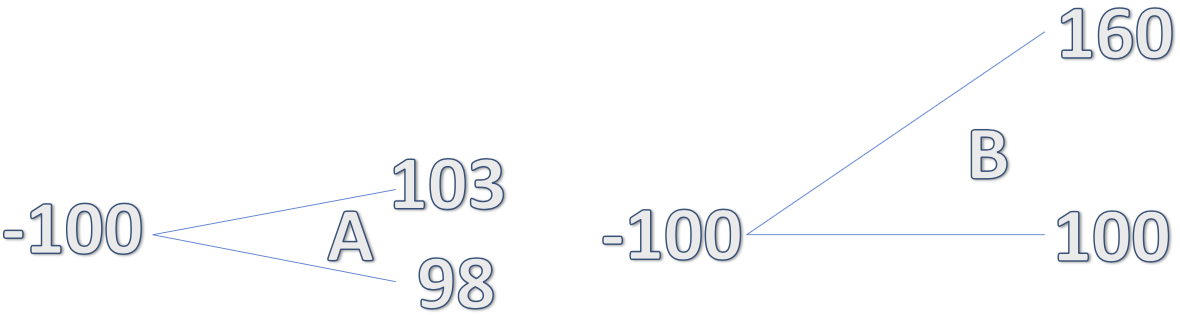

O investimento B tem maior risco! Em finanças associamos normalmente risco à incerteza ou 
amplitude dos retornos, ou seja ao seu desvio-parão.

Coloquialmente diríamos que A tem maior risco, mas nesse caso teríamos de qualificar 
o risco, falando de risco de PERDA.

Estes dois tipos de risco, **risco total** e **risco de perda**, irão desempenhar um papel muito importante nas análises que se irão seguir.

### 1.1.2. Tipologia dos riscos financeiros 

Risco de Mercado
 * Risco preço de ações: resulta da exposição a variações de (i) preços e (ii) volatilidades de ações individuais, carteiras de ações e índices de ações.
 * Risco cambial: resulta da exposição a variações de (i) preços *spot*, (ii) preços *forward* e à (iii) volatilidade de taxas de câmbio. 
 * Risco taxa de juro: resulta da exposição a variações (i) no nível, inclinação e curvatura da estrutura temporal de taxas de juro, (ii) da volatilidade de taxas de juro, (iii) na velocidade de reembolsos antecipados (*prepayment*) e (iv) *spreads* de crédito.
 * Risco preço de *commodities*: resulta da exposição a variações de (i) preços *spot*, (ii) preços *forward* e (iii) volatilidades de *commodities*, tais como *crude oil*, produtos derivados do petróleo, gás natural, electricidade, metais preciosos e metais base.

Risco de Crédito
 * Concessão crédito
 * Risco da contraparte

Risco Operacional

## 1.2. Medidas de Risco

### 1.2.1. Medida de Risco Total: Volatilidade 

A volatilidade é o grau de dispersão de uma série cronológica de preços ao longo do tempo, geralmente medida pelo desvio padrão dos retornos logarítmicos.

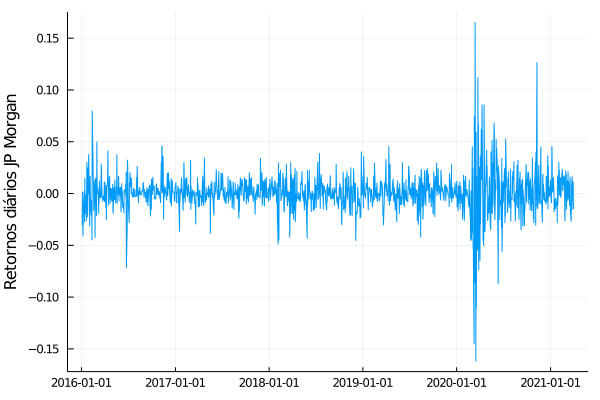

In [86]:
plot(Datas, JPMorgan, legend = false, ylabel = "Retornos diários JP Morgan")

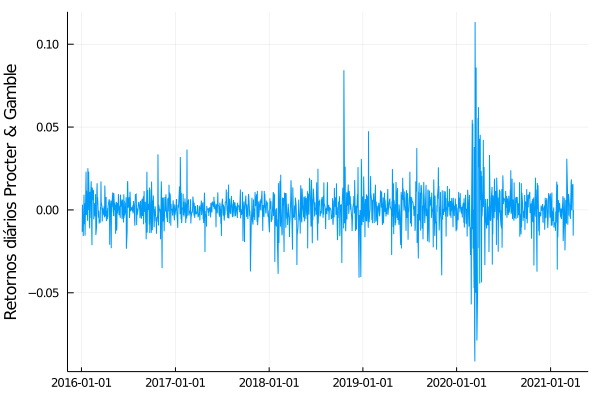

In [87]:
plot(Datas, PG, legend = false, ylabel = "Retornos diários Procter & Gamble")

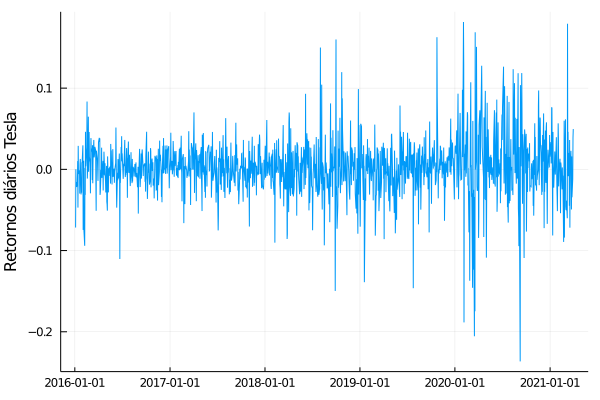

In [88]:
plot(Datas, Tesla, legend = false, ylabel = "Retornos diários Tesla")

In [89]:
println("σ(J.P.Morgan) = ", std(JPMorgan))
println("σ(Procter & Gamble) = ", std(PG))
println("σ(Tesla) = ",std(Tesla))

σ(J.P.Morgan) = 0.01905800971518296
σ(Procter & Gamble) = 0.012552122228039423
σ(Tesla) = 0.03686990880693381


### 1.2.2. Medidas de Risco de Perda: Valor-em-Risco (VaR) e Perda Esperada na Cauda (ETL)

O **Valor-em-Risco**, ou VaR (*Value-at-Risk*) a um nível (α%), mede qual será a nossa perda mínima no caso de perdas tão severas que ocorrem apenas (α) por cento do tempo.

A **Perda Esperada na Cauda**, ou ETL (*Expected Tail Loss*) a um nível (α%), mede qual será a nossa perda média no caso de perdas tão severas que ocorrem apenas (α) por cento do tempo. O ETL também é frequentemente denominado como *Expected Shortfall* (ES) ou *Conditional Value-at-Risk* (CVaR).

Para uma dada carteira, as medidas de risco VaR e ETL são calculadas considerando (i) o valor atual ($V_0$) da carteira, (ii) um horizonte temporal ($T$), assim como (iii) um determinado quantil ($\alpha$) de perdas, e (iv) pressupõem uma determinada distribuição de probabilidade (empírica ou analítica) para os retornos. 

$$\text{VaR}(V_0,T,α):\quad \mathbb{P}[\Delta V_T < - \text{VaR}] = \alpha$$

$$\text{ETL}(V_0,T,α):\quad \mathbb{E}[\Delta V_T \mid \Delta V_T < - \text{VaR}] = \alpha$$

Exemplo:
* VaR(T=1 dia, α=5%) = 50 000 Eur, significa que existe uma probabilidade de 5% de num dia a carteira vir a ter uma perda superior a 50 000 Eur. 
* ETL(T=1 dia, α=5%) = 65 000 Eur, significa que para os 5% piores desempenhos diários, a carteira irá ter uma perda em média superior a 65 000 Eur.

As medidas de risco VaR e ETL têm quatro usos principais em finanças:
* gestão de risco
* controlo financeiro
* relato financeiro 
* cálculo do capital regulatório

## 1.3. Determinação do VaR e ETL

Metodologias:
 * Abordagem empírica por simulação histórica
 * Abordagem paramétrica pelo método analítico
 * Abordagem paramétrica por simulação de Monte-Carlo

In [90]:
# Nos exemplos seguintes, o valor da carteira V = 1 000 000 USD e o α = 5.0%
V = 1_000_000;  
α = 0.05;
# Podíamos ter V = 1000000, escolhemos o formato anterior para ficar mais legível

### 1.3.1. Cálculo do VaR por simulação histórica

Séries temporais históricas de retornos → VaR, ETL

#### 1.3.1.1. VaR

In [91]:
# Definição do VaR ao nível de significância α ou nível de confiança (1-α)
VaR(retornos, α, V) = - (quantile(retornos,α) - mean(retornos)) * V

VaR (generic function with 1 method)

In [92]:
println("VaR(JPMorgan) = ", VaR(JPMorgan, α, V), " USD")
println("VaR(Procter & Gamble) = ", VaR(PG, α, V), " USD")
println("VaR diário Tesla = ", VaR(Tesla, α, V), " USD")

VaR(JPMorgan) = 27485.723035572864 USD
VaR(Procter & Gamble) = 16675.443101124984 USD
VaR diário Tesla = 53322.68782360527 USD


#### 1.3.1.2. ETL

In [93]:
function ETL(retornos, alfa, V)
    nobs = length(retornos)
    corte = quantile(retornos, alfa)
    excedimentos = 0
    n_excedimentos = 0
    for i in 1:nobs
        if retornos[i] <= corte
            excedimentos += retornos[i]
            n_excedimentos += 1
        end
    end
    return - (excedimentos/n_excedimentos - mean(retornos)) * V
end

ETL (generic function with 1 method)

Cálculo da perda esperada na cauda diária por simulação histórica 

In [94]:
alfa = 0.05
V = 1_000_000
println("ETL(JP Morgan) = USD ", ETL(JPMorgan, alfa, V))
println("ETL(Procter & Gamble) = USD ", ETL(PG, alfa, V))
println("ETL(Tesla) = USD ", ETL(Tesla, alfa, V))

ETL(JP Morgan) = USD 44913.59590399318
ETL(Procter & Gamble) = USD 30679.516661404334
ETL(Tesla) = USD 87940.3867857346


### 1.3.2. Cálculo do VaR e ETL pelo método analítico

Distribuição, parâmetros estimados → Fórmula analítica → VaR, ETL

- Estimar parâmetros da distribuição escolhida. Neste exemplo, iremos escolher uma distribuição Normal - que assumimos bem caracterizar a distribuição dos retornos - e estimar os seus parâmetros (μ, σ)
- Utilizando a distribuição estimada, determinamos de seguida analiticamente o VaR 

Denotando por $\Phi$ a função de distribuição cumulativa da Normal($\mu,\sigma$), tem-se

$$\text{quantil}(\text{Normal}(\alpha\mid \mu, \sigma)) = \Phi^{-1}(\alpha\mid \mu, \sigma)$$ 
sendo $$\Phi(\alpha\mid \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}\int_{-\infty}^\alpha \exp\bigl({-\tfrac{1}{2}(x-\mu)^2/\sigma^2}\bigr)$$

Estimar parâmetros da distribuição Normal para os retornos diários do J.P.Morgan, 
Procter & Gamble e Tesla,

### 1.3.3. Cálculo do VaR por simulação de Monte-Carlo

Distribuição, parâmetros estimados → Séries temporais simuladas de retornos → VaR, ETL

- Estimar parâmetros da distribuição escolhida. Neste exemplo, iremos escolher uma distribuição Normal - que assumimos bem caracterizar a distribuição dos retornos - e estimar os seus parâmetros (μ, σ)
- Utilizando a distribuição estimada, simulamos os retornos e a partir desses valores simulados calculamos o VaR

**Exemplo** Pretendemos obter estimativas para os VaRm diários com α=5%, de três carteiras no montante de EUR 500 000 de ações JP Morgan, Procter & Gamble e Tesla através da abordagem paramétrica por simulação de Monte-Carlo, assumindo distribuições Normais para os retornos das ações.

In [95]:
alfa = 0.05
V = 500_000
vJPMorgan = std(JPMorgan)
vPG = std(PG)
vTesla = std(Tesla)

0.03686990880693381

De seguida, utilizando a função $\texttt{rand}$, simulamos 5000 retornos diários gerados por distribuições Normais com médias zero e desvios-padrão iguais às volatilidades atrás calculadas,

In [96]:
simJPMorgan = rand(Normal(0, vJPMorgan), 5000)
simPG = rand(Normal(0, vPG), 5000)
simTesla = rand(Normal(0, vTesla), 5000)

5000-element Vector{Float64}:
  0.01721231531365925
 -0.01964040726240832
 -0.025338642763167964
 -0.023949324148793118
  0.03385762998407014
 -0.016419277638615892
 -0.02962675110464589
 -0.07977653520945743
  0.09490220989981371
  0.05553248528863333
  0.04841656591012744
 -0.030528194119893656
  0.10982510360803048
  ⋮
  0.0123872659111116
  0.04313656083317982
 -0.015983752388162666
 -0.02777572179487572
  0.044781966636877495
  0.022171864678961057
 -0.0030018806238189385
  0.03889706052677966
 -0.04747152253963148
 -0.04195107476875273
  0.007683035887392236
 -0.09377034675623801

Com base nos retornos simulados iremos agora calcular os VaR, de forma semelhante ao que fizemos através de simulação histórica. A diferença, claro, é que agora se tratam de retornos simulados e não de retornos históricos,

In [97]:
println("VaR(JP Morgan) = USD ", VaR(simJPMorgan, alfa, V))
println("VaR(Procter & Gamble) = USD ", VaR(simPG, alfa, V))
println("VaR(Tesla) = USD ", VaR(simTesla, alfa, V))

VaR(JP Morgan) = USD 15398.229203683708
VaR(Procter & Gamble) = USD 10568.70866178461
VaR(Tesla) = USD 29713.846609237495


Uma vez obtidas as séries cronológicas para os retornos simulados das ações JP Morgan, Procter \& Gamble e Tesla, podemos agora determinar o ETL por simulação de Monte-Carlo, também de forma semelhante ao que fizemos através da simulação histórica.

In [98]:
println("ETL(JP Morgan) = USD ", ETL(simJPMorgan, alfa, V))
println("ETL(Procter & Gamble) = USD ", ETL(simPG, alfa, V))
println("ETL(Tesla) = USD ", ETL(Tesla, alfa, V))

ETL(JP Morgan) = USD 19520.29701993718
ETL(Procter & Gamble) = USD 13022.685602722167
ETL(Tesla) = USD 43970.1933928673


### 1.3.4. Retornos esperados e o cálculo do VaR e ETL

O VaR e ETL (ou *Excess Shortfall* ou *Conditional VaR*) são medidas prospectivas, dizem respeito a perdas potenciais em momentos futuros. Interessa assim determinar o **valor esperado** do retorno da carteira $\mu_T = \mathbb{E}[\text{r}_T]$ e não a utilização do valor histórico da média dos retornos da carteira. 

O VaR (e ETL) pode ser definido utilizando a variação do valor prospetivo da carteira $V_T$ relativamente ao seu **valor esperado** $\mathbb{E}[V_T]$, denominado-o por VaR média ($\text{VaR}_m$), 

$$\text{VaR}_m = -(\text{quantil}_\alpha[V_T] - \mathbb{E}[V_T]) = - (\text{quantil}_\alpha[r_T] - \mu_T) \times V_0$$

Alternativamente, o VaR (e ETL) também pode ser definido utilizando a variação do valor prospetivo da carteira $V_T$ relativamente ao seu valor atual $V_0$, denominando-o por VaR zero ($\text{VaR}_0$),

$$\text{VaR}_0 = -(\text{quantil}_\alpha[V_T] - V_0) = - \text{quantil}_\alpha[r_T] \times V_0$$

O valor esperado dos retornos irá ser calculado de acordo com algum modelo, envolvendo normalmente a previsão de valores para algumas variáveis exógenas e a estimação de alguns parâmetros. Se fosse utilizado o CAPM, teríamos de efetuar (i) uma previsão para o valor esperado da variável exógena: retorno da carteira do mercado e (ii) a estimativa do parâmetro: beta da carteira em análise. 

Seja $\mu$ o retorno simples esperado da carteira em termos anuais. Como por convenção se considera que um ano tem 252 dias úteis, o retorno esperado para a carteira num dia será 
$$\mu_T = (1+\mu)^{\frac{T}{252}}-1$$

Normalmente o VaR e ETL são calculados para horizontes temporais curtos, de 1-10 dias úteis. Uma vez que $\mu_T\approx 0$ e não existe uma forma objectiva de determinar $\mu_T$,  é comum assumir-se que $\mu_T = 0$.

Nas análises subsequentes, tal como fizemos nas análises anteriores, iremos pois também assumir que o retorno esperado da carteira é igual a zero, ou seja que $\mu_T = 0$, e que portanto o $\text{VaR}_m$ e $\text{VaR}_0$ coincidem.

Dado $\mu_T = 0$, nas abordagens paramétricas (método analítico e simulação de Monte-Carlo) a distribuição prospetiva de retornos $r_T$ será,
$$r_T \sim \text{Distribuição}(0, \sigma_T)$$ 
ou
$$r_T \sim \sigma_T\times \text{Distribuição}(0, 1)$$ 
Se a distribição for uma Normal, estaremos perante uma Normal standard. Assim, podemos exprimir o VaR da seguinte forma equivalente

$$\text{VaR} = - \text{quantil}_\alpha[r_T]  \times V_0 = - \sigma_T \times \text{quantil}_\alpha[\text{Distribuição}(0,1)]  \times V_0$$

Se não tivéssemos disponível a aplicação Julia, poderíamos nos socorrer de tabelas estatísticas que tabelam os quantis de distribuições padronizadas. Assim para as distribuições Normal e T-Student(6) padronizadas obteríamos os seguintes valores críticos $z_\alpha\equiv\text{quantil}_\alpha[\text{Distribuição}(0,1)]$


   quantil |    Nomal     | T-Student(6)
---------------|--------------|--------------
    1.0%  |   -2.326     |   -3.143
5.0%  |   -1.645     |   -1.943
10.0%  |   -1.282     |   -1.440


$$\text{VaR}_\alpha = - z_\alpha \times \sigma_T \times V_0$$

**Exemplo 1**. Pretendemos determinar o VaR diário do fundo de investimento Eureka de EUR 5.0 $\times$ 10$^6$ para os níveis $\alpha$ = 1.0\% e 2.5\%. A volatilidade diária foi estimada em 0.0065 e assume-se que uma Normal caracteriza bem a distribuição dos retornos.

Para $\alpha$ = 1.0\% temos, VaR = -(-2.326) $\times$ 0.0065 $\times$ 5000000 = EUR 75595.00. Temos pois uma probabilidade de 1.0% de virmos a ter uma perda superior a EUR 75595.00 num prazo de um dia.

Para $\alpha$ = 2.5\% não temos valores tabelados, mas claro podemos sempre utilizar a aplicação Julia,

In [99]:
V = 5_000_000
σ = 0.0065
α = 0.025 
VaR_Eureka = - quantile(Normal(0,1),α) * σ  * V

println("VaR(2.5%) = EUR ", round(VaR_Eureka, digits = 2))
# A função round(expressão, digits = n) arredonda o resultado da expressão a n dígitos

VaR(2.5%) = EUR 63698.83


### 1.3.5. Agregação Temporal

Para transformar o VaR de um horizonte temporal para um outro diferente é geralmente assumido que os retornos satisfazem as seguintes condições,
* Temporalmente independentes, o que implica que $\forall t, \; \text{cov}(r_t,r_{t-1})$ = 0
* Identicamente Distribuídos, o que implica que $\forall t, \;\mathbb{E}[r_t]=\mu, \text{Variância}[r_t] = \sigma^2$

A presunção de retornos independentes é consistente com a hipótese de eficiência de mercados. Podemos transformar a média e a volatilidade diárias num horizonte de T dias fazendo

$$\mu_T = T \times \mu_\text{dia}$$
$$\sigma_T = \sqrt{T}\times \sigma_\text{dia}$$
Donde,

$$\text{VaR}^T_\alpha = - z_\alpha \times \sqrt{T} \times \sigma_\text{dia} \times V_0 $$

A condição de independência temporal poder ser testada através da estatística Q de [Ljung-Box](https://en.wikipedia.org/wiki/Ljung–Box_test), sendo a hipótese nula de independência da série cronológica. Função em Julia: ```LjungBoxTest(vetor_retornos, lag)```

**Exemplo 2**. O Fundo Eureka pretende agora determinar qual o VaR semanal da sua carteira a 1.0%.

Como não dispomos da volatilidade semanal dos retornos, iremos utilizar a volatilidade diária e fazer agregação temporal. Primeiro iremos testar a condição de independência temporal dos retornos para a JP Morgan, Procter & Gamble e Tesla

In [100]:
LjungBoxTest(JPMorgan, 2)

Ljung-Box autocorrelation test
------------------------------
Population details:
    parameter of interest:   autocorrelations up to lag k
    value under h_0:         "all zero"
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           <1e-12

Details:
    number of observations:         1320
    number of lags:                 2
    degrees of freedom correction:  0
    Q statistic:                    55.5154


In [101]:
LjungBoxTest(PG, 2)

Ljung-Box autocorrelation test
------------------------------
Population details:
    parameter of interest:   autocorrelations up to lag k
    value under h_0:         "all zero"
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           <1e-04

Details:
    number of observations:         1320
    number of lags:                 2
    degrees of freedom correction:  0
    Q statistic:                    22.2014


In [102]:
LjungBoxTest(Tesla, 2)

Ljung-Box autocorrelation test
------------------------------
Population details:
    parameter of interest:   autocorrelations up to lag k
    value under h_0:         "all zero"
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.2962

Details:
    number of observations:         1320
    number of lags:                 2
    degrees of freedom correction:  0
    Q statistic:                    2.43372


O teste de Ljung-Box rejeita a independência temporal dos retornos da JP Morgan e Procter & Gamble, ao contrário do que se passa com os retornos da Tesla. A dependência temporal está de acordo com a existência de fortes agrupamentos de volatilidade para a JP Morgan e Procter & Gamble.

Não obstante, iremos fazer a agregação temporal da volatilidade e considerando que uma semana tem 5 dias úteis teremos,
$$\text{VaR}^\text{semanal}_\alpha = -(-2.326) \times \sqrt{5} \times 0.0065 \times 5000000 = 169060.84$$

In [103]:
V = 5_000_000
σ = 0.0065
α = 0.01
T = 5
VaR_Eureka_semanal = - quantile(Normal(0,1),α) * sqrt(T) * σ  * V

println("VaR(1.0%) semanal = EUR ", round(VaR_Eureka_semanal, digits = 2))

VaR(1.0%) semanal = EUR 169060.84


### 1.3.6. Limitações do VaR e ETL

* Movimentos anteriores nos fatores de risco do mercado podem não produzir previsões suficientemente precisas de todos os movimentos futuros do mercado
* O VaR e ETL não levam em consideração a liquidez relativa de diferentes posições de risco
* O VaR e ETL não estimam perdas potenciais em horizontes de tempo mais longos, onde os movimentos do mercado podem ser extremos

## 1.4. Testes de Stresse

Juntamente com o VaR e ETL, os testes de stresse são uma importante ferramenta usada na avaliação do risco de perda. Enquanto o VaR e ETL refletem o risco de perda devido a
mudanças adversas nos mercados usando o recente comportamento histórico do mercado, os 
testes de stresse refletem o risco de perda de mudanças hipotéticas no valor de posições 
sensíveis ao risco de mercado. Os teste de stresse medem pois a vulnerabilidade a perdas sob uma série de possíveis cenários de stresse económico e de mercado.

### 1.4.1. Análise de sensibilidade

A análise de sensibilidade é usada para quantificar o impacto de um movimento de mercado em um único fator de risco em todas as posições detidas (por exemplo, preços de ações ou spreads de crédito) usando uma variedade de choques de mercado, variando desde aqueles que poderiam ser esperados ao longo de horizonte de um dia até aqueles que podem levar muitos meses a ocorrer.

### 1.4.2. Análise de cenários

A análise de cenário é usada para quantificar o impacto de um evento específico, incluindo como o evento impacta vários fatores de risco simultaneamente. Ao realizar uma análise de cenário, geralmente consideramos uma série de resultados possíveis para cada cenário, variando de impactos de mercado adversos moderados a severos. Os testes de stresse são normalmente construídos usando (i) eventos históricos e (ii) cenários prospectivos hipotéticos. 

**Exemplo 3.** Um cenário adverso utilizado num teste de stresse poderia ser simultaneamente, (i) taxa de desemprego: 12.5%,  (ii) taxa de variação do PIB: -2.5%, (iii)  taxa de variação do preço das ações: -40.0% e (iv) taxa de variação do preço de imóveis residenciais: -20.0%.

## 1.5. Procedimento de *Backtesting*

O *backtesting* é um método geral para aquilatar como um modelo ou estratégia de negociação funcionaria à posteriori (*ex-post*), usando dados históricos. 

Ao testar uma ideia com dados históricos, é conveniente reservar um período de tempo de dados históricos apenas para fins de teste. Se o teste com dados fora da amostra for bem sucedido, tal poderá ajudar a confirmar a potencial viabilidade do modelo ou estratégia de negociação.

A validação dos modelos / estratégias de negociação envolve a comparação das perdas históricas realizadas versus as perdas estimadas. No caso do VaR e ETL a comparação deverá ser efetuada calculando os hipotéticos retornos assumindo uma composição da carteira fixa no decorrer do horizonte temporal da análise. Esta validação pode ser feita confrontando o número de excepções observadas (no caso do VaR, o número de vezes em que a perda excedeu o VaR) com o nível de significância ($\alpha$) e a dimensão da amostra. 

**Exemplo 4.** Se $\alpha$ = 5.0\% e o *backtest* é efetuado para 240 dias úteis, o número esperado de exceções será 0.05 $\times$ 240 = 12. Iremos pois comparar este valor esperado com o número de exceções de fato observado.

Para formalmente podermos aceitar ou rejeitar um modelo ou estratégia de negociação necessitamos de efetuar um teste estatístico formal. O objectivo é testar se o número de exceções é muito grande ou pequeno utilizando a distribuição da estatística de teste que visa distinguir se o modelo é incorreto ou se as exceções resultaram de "má sorte". Fonte: Risco de Mercado, Miguel Ferreira.

### 1.5.1. Teste do semáforo de Basileia

Este teste, que é definido no Acordo de Basileia, consiste no cálculo do número de excepções diárias durante o último ano face à estimativa do VaR diário com $\alpha$ = 1.0%. O comitê de Basileia definiu que até quatro exceções num ano (zona verde) é aceitável e que para dez ou mais exceções (zona vermelha) a penalização é automática. Com 5-9 exceções (zona amarela), a decisão é discricionária por parte do supervisor bancário.

VaR diário com $\alpha$ = 1.0% e período de *backtest* de 250 dias. 

Zona     |	Exceções	 | Probabilidade	| Prob. Cumulativa
---------|-------------------|---------------|----------------------
Verde    |0	                 | 8.11%	      | 8.11%
         |1	    |20.47%	|28.58%
         |2	    |25.74%	|54.32%
         |3	|21.49%	|75.81%
         |4	|13.41%	|89.22%
Amarela	 |5	|6.66%	|95.88%
         |6	|2.75%	|98.63%
         |7	|0.97%	|99.60%
         |8	|0.30%	|99.89%
         |9	|0.08%	|99.97%
Vermelha |10	|0.02%	|99.99%
         |11	|0.00%	|100.00%
         |...	|...	|...
         
Fonte: Supervisory framework for the use of "backtesting" in conjunction with the internal models approach to market risk capital requirements. Basle Committee on Banking Supervision (1996).

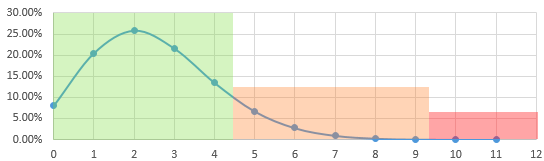

**Exemplo 5**. Pretendemos calcular o VaR diário a 1% para a Tesla de acordo com uma abordagem paramétrica, com dados para o último ano e aquilatar se este modelo iria passar o teste do semáforo de Basileia. Notemos que estamos a fazer uma análise dentro da amostra. Apesar disso, se por exemplo fizermos uma escolha desacertada para a distribuição que caracteriza os retornos, subestimando a probabilidade de eventos extremos, facilmente nos poderemos encontrar bastante fora da zona verda!

Como o ficheiro Tesla.csv não tem informação sobre datas, iremos utilizar as últimas 252 observações.  
1. Estimar o desvio-padrão da amostra
2. Assumir uma distribuição normal
3. Calcular o VaR, assumindo adicionalmente que $\mu_T$=0.
4. Calcular o número de exceções registadas face ao VaR que foi calculado em (3)
5. Classificar o número de exceções calculado em (4) de acordo com o teste do semáforo de Basileia   

In [104]:
Tesla252 = Tesla[end-251:end]  # criar amostra selecionando as 252 mais recentes observações

252-element Vector{Float64}:
 -0.08446091612999329
 -0.05789892336145011
  0.05467505162498084
  0.07276485869389633
  0.0550393242058477
  0.0061958310054263535
  0.043078763920338825
  0.12754714969613154
  0.08667715300465739
  0.027701647625609883
  0.02085445408841076
  0.011580360146688194
 -0.010038389170318573
  ⋮
 -0.04486533595853884
  0.036168696812729356
 -0.07184062752478923
  0.0026146540803348426
  0.022840977186786397
 -0.011770534365243222
 -0.04935884802742007
  0.015929058642061587
 -0.03444068779217042
 -0.012065258466172544
  0.03902945044049686
  0.04958247384447197

In [105]:
α = 0.01
V = 1               # Valor da carteira é uma unidade monetária
σ = std(Tesla252)   # Calcular a volatilidade

0.04821219401604213

In [106]:
VaR252 = - σ * quantile(Normal(0,1),α) * V
# Podíamos também ter utilizado VaR252 = -(-2.326) * σ por exemplo

0.11215833505206442

In [107]:
Exceções = zeros(252)         # Inicializar o vetor das Exceções a zero
for i in 1:252
    if Tesla252[i] <= -VaR252
        Exceções[i] = 1       # Esta observação constitui uma exceção (representada por 1)
    end
end

In [108]:
Exceções[1:10]       # Vetor de exceções para as 10 primeiras observações

10-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

Como podemos observar, já nas 10 primeiras observações registamos 3 exceções (na 1, 6 e 8 observação). De facto essas observações (-0.14586457137702016, -0.20552226728199768, 0.17476299085707075) ultrapassam o limite: -VaR = -0.12373543868607244. Mas qual será o número total de exceções?

In [109]:
sum(Exceções)  # Somamos as exceções verificadas

1.0

Apesar de um começo pouco auspicioso, acabamos por ter no total apenas 4 exceções. Embora seja um número superior ao valor esperado de 1% $\times$ 252 = 2.52, estamos na desejada zona verde do teste do semáforo de Basileia!

### 1.5.2. Teste de cobertura incondicional de Kupiec

Denotemos por T o número de observações, por N o número de exceções e como habitual por α o nível de significância associado ao VaR. O teste de cobertura incondicional de Kupiec é dado por,

In [110]:
Kupiec(T, N, α) = -2 * log((1-α)^(T-N) * α^N) + 2 * log((1-N/T)^(T-N) * (N/T)^N);

tendo uma distibuição chi-quadrado com um grau de liberdade. A hipótese nula é de que o modelo de VaR é adequado. O valor crítico a 5.0% é dado por,

In [111]:
zchi = quantile(Chisq(1),0.95)  # Calculamos o valor crítico a 5%

3.841458820694124

Se Kupiec > 3.841588 $\rightarrow$ rejeitamos modelo VaR

Se Kupied < 3.841588 $\rightarrow$ não rejeitamos modelo VaR

**Exemplo 6.** Será o nosso modelo muito simples para o VaR das ações Tesla criado no exercício 5. rejeitado pelo teste de cobertura incondicional de Kupiec?

In [112]:
T = 252
N = 4
α = 0.01
TesteKupiec = Kupiec(T, N, α)

0.7450809522744137

TesteKupec < 3.841588, donde que não rejeitamos o modelo criado para calcular o VaR das ações Tesla!

## 1.6. Retornos: Regularidades Empíricas

* Caudas pesadas (*fat tails*)
* Agrupamentos de volatilidade (*volatility clusters*)
* Dependência não-linear

### 1.6.1. Caudas pesadas

A existência de caudas pesadas (*fat tails*) sugere que se utilize outras distribuições, que não a Normal, com essa característica. Uma escolha popular é a distribuição T-Student com um número baixo de graus de liberdade.

#### 1.6.1.1. Gráficos QQ

Uma forma visual de comparar a distribuição empírica com a distribuição teórica candidata à sua representação é através de gráficos quantil-quantil, ou mais abreviadamente QQ.

Se pretendemos aquilatar numa primeira abordagem em que medida os retornos da (i) JP Morgan, (ii) Procter & Gamble e (iii) Tesla são bem representados por uma distribuição Normal, podemos comparar através de gráficos QQ os quantis das distribuições empíricas dos retornos destas ações com os quantis de uma distribuição Normal com idêntica média e desvio-padrão. 

**Exemplo 7.** Pretendemos inspecionar visualmente se uma distribuição Normal proporcionará uma boa caracterização das séries cronológicas de retornos das acções da JP Morgan, Procter & Gamble e Tesla. Para tal vamos padronizar as distribuições empíricas dos retornos subtraindo a média e dividindo pelo desvio padrão.

In [113]:
JPMorganP = (JPMorgan .- mean(JPMorgan))./std(JPMorgan);
PGP = (PG .- mean(PG))./std(PG);
TeslaP = (Tesla .- mean(Tesla))./std(Tesla);
# utilizamos o ponto para aplicar uma operação ou função elemento-a-elemento de um vetor

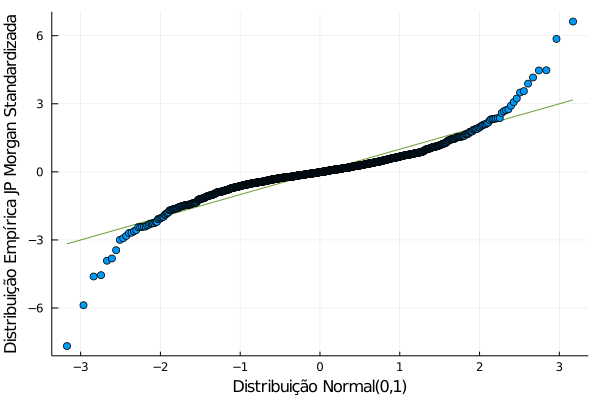

In [114]:
qqplot(Normal(0, 1), JPMorganP, xlabel="Distribuição Normal(0,1)", 
    ylabel = "Distribuição Empírica JP Morgan Standardizada")

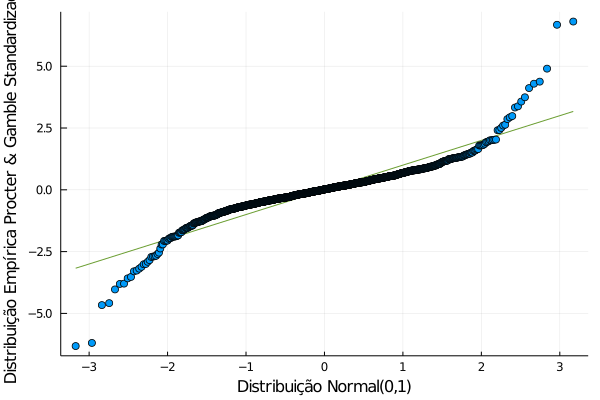

In [115]:
qqplot(Normal(0, 1), PGP, xlabel="Distribuição Normal(0,1)", 
    ylabel = "Distribuição Empírica Procter & Gamble Standardizada")

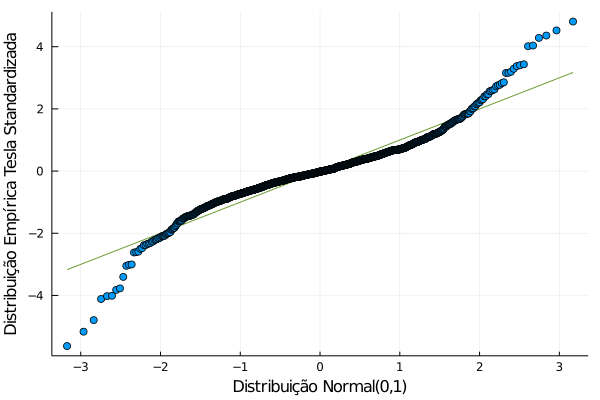

In [116]:
qqplot(Normal(0, 1), TeslaP, xlabel="Distribuição Normal(0,1)", 
    ylabel = "Distribuição Empírica Tesla Standardizada")

Podemos constatar que a probabilidade de eventos extremos nos retornos da JP Morgam, Procter & Gamble e Tesla são bastante superiores ao que uma distribuição Normal sugeriria.

Podemos ver se a situção melhora com a utilização de uma distribuição com caudas mais pesadas como uma distribuição T-Studant standard, neste caso com 5 graus de liberdade. 

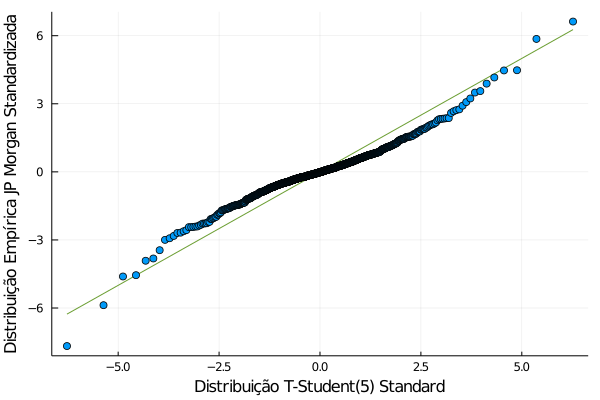

In [117]:
qqplot(TDist(5), JPMorganP,  xlabel = "Distribuição T-Student(5) Standard",
ylabel = "Distribuição Empírica JP Morgan Standardizada")
# TDist(5) representa uma distribuição T-Student standard com 5 graus de liberdade

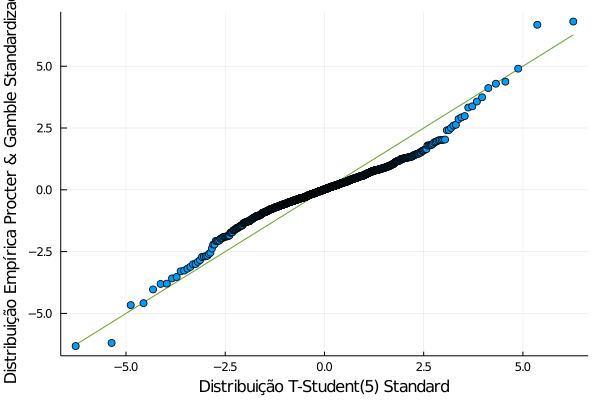

In [118]:
qqplot(TDist(5), PGP, xlabel = "Distribuição T-Student(5) Standard",
ylabel = "Distribuição Empírica Procter & Gamble Standardizada")

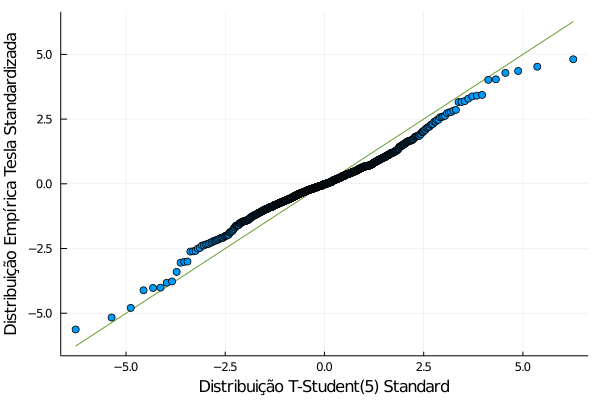

In [119]:
qqplot(TDist(5), TeslaP, xlabel = "Distribuição T-Student(5) Standard",
ylabel = "Distribuição Empírica Tesla Standardizada")

Os gráficos Q-Q sugerem que uma distribuição T-Student com um número baixo de graus de liberdade poderá representar melhor o perfil de retornos observado para as ações da JP Morgan, Procter & Gamble e Tesla do que uma distribuição Normal. 

#### 1.6.1.2. Testes de Normalidade

Iremos efetuar o teste de [Jarque-Bera](https://en.wikipedia.org/wiki/Jarque–Bera_test) para a hipótese nula de que os vetores de retornos da JP Morgan, Procter & Gamble e Tesla são normalmente distribuídos. Função em Julia: ```JarqueBeraTest(retornos)```

In [120]:
JarqueBeraTest(JPMorgan)

Jarque-Bera normality test
--------------------------
Population details:
    parameter of interest:   skewness and kurtosis
    value under h_0:         "0 and 3"
    point estimate:          "-0.08402928788438187 and 18.477439562442576"

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           <1e-99

Details:
    number of observations:         1320
    JB statistic:                   13176.9


In [121]:
JarqueBeraTest(PG)

Jarque-Bera normality test
--------------------------
Population details:
    parameter of interest:   skewness and kurtosis
    value under h_0:         "0 and 3"
    point estimate:          "0.21516390694295315 and 17.60563817081463"

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           <1e-99

Details:
    number of observations:         1320
    JB statistic:                   11743.0


In [122]:
JarqueBeraTest(Tesla)

Jarque-Bera normality test
--------------------------
Population details:
    parameter of interest:   skewness and kurtosis
    value under h_0:         "0 and 3"
    point estimate:          "-0.14365367826525396 and 8.824080343290577"

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           <1e-99

Details:
    number of observations:         1320
    JB statistic:                   1870.14


Para a JP Morgan, Procter & Gamble e Tesla a hipótese nula de normalidade dos retornos é fortemente rejeitada.

### 1.6.2. Agrupamentos de volatilidade

A existência de agrupamentos de volatilidade sugere que a utilização de volatilidades constantes possa conduzir a uma especificação errada para o processo dos retornos. Escolhas populares para ultrapassar este problema na previsão da volatilidade dos retornos são, a utilização de:
 * Estimação da volatilidade através de médias móveis ponderadas exponencialmente (EWMA)
 * Estimação da volatilidade através de modelos GARCH 
 * Extração de volatilidades implícitas do mercado de instrumentos derivados

#### 1.6.2.1. Teste para presença de agrupamentos de volatilidade

Um teste estatístico formal para a presença de agrupamente de volatilidade é teste ARCH-LM de Engle. A estatística do teste segue uma distribuição chi-quadrado sob a hipótese nula de inexistência de agrupamentos de volatilidade. O teste de Engle pode ser realizado através da função: $\texttt{ARCHLMTest}$(*retornos*,*lag*)

In [123]:
ARCHLMTest(JPMorgan,1)

ARCH LM test for conditional heteroskedasticity
-----------------------------------------------
Population details:
    parameter of interest:   T⋅R² in auxiliary regression
    value under h_0:         0
    point estimate:          287.602

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-63

Details:
    sample size:                    1320
    number of lags:                 1
    LM statistic:                   287.602


In [124]:
ARCHLMTest(PG,1)

ARCH LM test for conditional heteroskedasticity
-----------------------------------------------
Population details:
    parameter of interest:   T⋅R² in auxiliary regression
    value under h_0:         0
    point estimate:          305.32

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-67

Details:
    sample size:                    1320
    number of lags:                 1
    LM statistic:                   305.32


In [125]:
ARCHLMTest(Tesla,1)

ARCH LM test for conditional heteroskedasticity
-----------------------------------------------
Population details:
    parameter of interest:   T⋅R² in auxiliary regression
    value under h_0:         0
    point estimate:          44.4475

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-10

Details:
    sample size:                    1320
    number of lags:                 1
    LM statistic:                   44.4475


Para qualquer uma das séries cronológicas de retornos da JP Morgan, Procter \& Gamble e Tesla, rejeitamos a inexistência de agrupamento de volatilidade.

#### 1.6.2.2. Simulação histórica clássica: médias móveis simples

A determinação da volatilidade (ou variância) através de médias móveis simples corresponde a assumir-se que o contributo de cada observação para o seu valor é idêntico na janela de dados. Sendo ($m$) o número de dias na janela de dados utilizada e ($u_{t-k}$) a diferença entre o retorno ($r_{t-k}$) e a média de retornos ($\mu$), temos

$$\sigma^2_t = \frac{1}{m}\sum_{k=1}^m u_{t-k}^2, \qquad u_{t-k} = r_{t-k}-\mu$$

Todos os retornos quadráticos têm igual ponderação 1/m. Na volatilidade calculada através de médias móveis simples, um retorno muito recente não tem maior impacto no cálculo da volatilidade do que um retorno muito afastado.

**Exemplo**. Pretendemos estimar a volatilidade com médias móveis simples (MMS) para uma janela de dados correspondente ao último ano (252 observações).

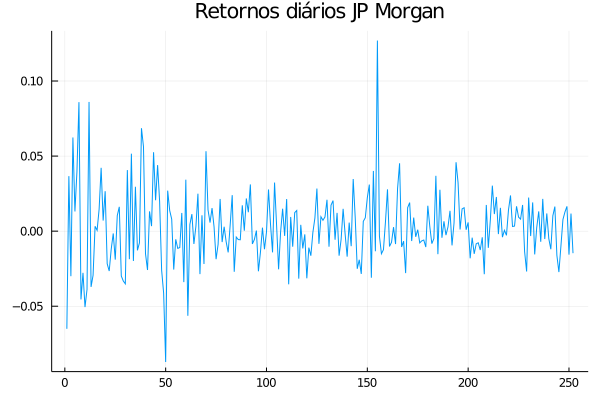

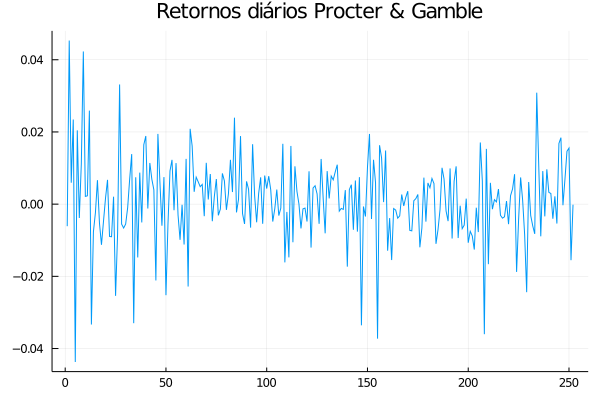

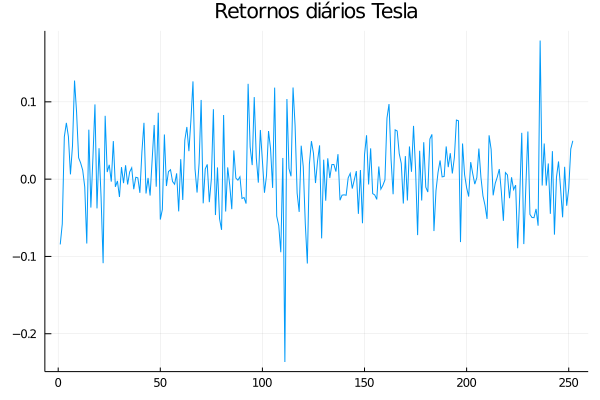

Volatilidade(JPMorgan) = 0.024546847500188353
Volatilidade(Procter & Gamble) = 0.011786366749602236
Volatilidade(Tesla) = 0.04821219401604213


In [126]:
display(plot(JPMorgan[end-251:end], title = "Retornos diários JP Morgan", legend = false))
display(plot(PG[end-251:end], title = "Retornos diários Procter & Gamble", legend = false))
display(plot(Tesla[end-251:end], title = "Retornos diários Tesla", legend = false))
println("Volatilidade(JPMorgan) = ", std(JPMorgan[end-251:end]))
println("Volatilidade(Procter & Gamble) = ", std(PG[end-251:end]))
println("Volatilidade(Tesla) = ", std(Tesla[end-251:end]))

#### 1.6.2.3. Simulação histórica filtrada: médias móveis ponderadas exponencialmente

Nas médias móveis exponencialmente ponderadas (MMEP), ou EWMA (*exponentially weighted moving average*), os retornos mais recentes têm uma mais elevada ponderação na determinação da variância. Os retornos quadráticos têm associado um parâmetro de alisamento $\lambda \in (0,1)$ que define ponderadores variáveis da seguinte forma,

$$\sigma^2_t =\sum_{k=1}^m(1-\lambda)\lambda^{k-1} \,u_{t-k}^2, \qquad u_{t-k} = r_{t-k}-\mu $$ 

Num documento influente, da [RiskMetrics](https://www.msci.com/documents/10199/5915b101-4206-4ba0-aee2-3449d5c7e95a), então parte da J.P.Morgan/Reuters, é sugerida a utilização do valor 0.94 para o parâmetro ($\lambda$) no caso de retornos diários. Assim, teríamos uma ponderação do retorno quadrático de (1-0.94)$\times$0.94$^0$ = 0.06 para a observação mais recente, para a observação seguinte de (1-0.94)$\times$0.94$^1$ = 0.0564. O retorno quadrático do terceiro dia mais recente teria uma ponderação igual a (1-0.94)$\times$0.94$^2$ = 0.053016.

A equação anterior pode ser expressa de uma forma recursiva equivalente através de,

$$\sigma^2_t = \lambda\,\sigma^2_{t-1} + (1-\lambda)\,u^2_{t-1}, \qquad u_{t-1} = r_{t-1}-\mu $$

Um parâmetro $\lambda$ mais elevado induz um decaimento mais vagaroso nos ponderadores da série cronológica. Pelo contrário, se reduzirmos o parâmetro $\lambda$ teremos um decaimento mais rápido.

In [127]:
function EWMA(serie, lambda)
    m = length(serie)
    media = mean(serie)                 # calculamos a média dos retornos observados
    σ2 = 0
    for k in 1:m
        σ2 += (1-lambda)*lambda^(k-1) * (serie[end-k+1] - media)^2
    end
    return sqrt(σ2)                     # retornamos a volatilidade
end

EWMA (generic function with 1 method)

**Exemplo 8.** Pretendemos comparar a volatilidade calculada por médias móveis simples com a volatilidade calculada através de médias móveis ponderadas exponencialmente (EWMA)

In [128]:
println("σ(JP Morgan): MMS = ", std(JPMorgan), 
    ", EWMA = ", EWMA(JPMorgan, 0.94))

println("σ(Procter & Gamble): MMS = ", std(PG), 
    ", EWMA = ", EWMA(PG, 0.94))

println("σ(Tesla): MMS = ", std(Tesla), 
    ", EWMA = ", EWMA(Tesla, 0.94))

σ(JP Morgan): MMS = 0.01905800971518296, EWMA = 0.014717907601836768
σ(Procter & Gamble): MMS = 0.012552122228039423, EWMA = 0.011073308580940749
σ(Tesla): MMS = 0.03686990880693381, EWMA = 0.04697281152136532


A JP Morgan está atualmente num regime de volatilidade mais baixo do que a média histórica, para a Procter & Gamble os niveis de volatildade são semelhantes e para a Tesla o atual regime de volatilidade ainda é mais alto do que a média histórica, já de si bastante alto.

#### 1.6.2.4. Modelos GARCH

Os modelos GARCH (*generalized autoregressive conditional heteroskedasticity*) são frequentemente utilizados para modelizar séries cronológicas financeiras que evidenciam volatilidade temporalmente variável e agrupamentos de volatilidade e podem-se incluir na família de modelos de volatilidade estocástica.

O modelo GARCH(p,q), onde $p$ é a ordem dos termos GARCH em $\sigma^2$ e $q$ é a ordem dos termos GARCH em $u^2$, é dado por,

$$\sigma^2_t = \omega +  \sum_{k=1}^p \beta_{k} \sigma_{t-k}^2 + \sum_{k=1}^q \alpha_{k} u_{t-k}^2, \qquad u_{t-k} = r_{t-k}-\mu $$

Os modelos GARCH contituem uma generalização da equação utilizada pelo método EWMA. Envolvem também um processo de estimação repousando em hipóteses sobre a distribuição dos desvios dos retornos face à sua média, ao contrário do método EWMA. Os $p$ parâmetros $\alpha_k$ e $q$ parâmetros $\beta_k$ podem ser estimados econometricamente pela aplicação `ARCHModels` escrita em Julia. É o que faremos no exemplo seguinte.

**Exemplo 9.** Utilizando a aplicação `ARCHModels` pretendemos estimar modelos GARCH(1,1) para as séries cronológicas de retornos da JP Morgan, Procter & Gamble e Tesla e obter estimativas para a volatilidade, comparando estas com as volatilidades simples já anteriormente calculadas.

In [129]:
gJPMorgan = fit(GARCH{1, 1}, JPMorgan)


GARCH{1, 1} model with Gaussian errors, T=1320.

Mean equation parameters:
─────────────────────────────────────────────
     Estimate    Std.Error  z value  Pr(>|z|)
─────────────────────────────────────────────
μ  0.00114049  0.000366514  3.11171    0.0019
─────────────────────────────────────────────

Volatility parameters:
──────────────────────────────────────────────
      Estimate   Std.Error   z value  Pr(>|z|)
──────────────────────────────────────────────
ω   1.93206e-5  3.46177e-6   5.58113    <1e-07
β₁  0.749107    0.0277523   26.9926     <1e-99
α₁  0.180103    0.0407034    4.42476    <1e-05
──────────────────────────────────────────────


In [130]:
gPG = fit(GARCH{1, 1}, PG)


GARCH{1, 1} model with Gaussian errors, T=1320.

Mean equation parameters:
──────────────────────────────────────────────
      Estimate    Std.Error  z value  Pr(>|z|)
──────────────────────────────────────────────
μ  0.000569097  0.000257788  2.20762    0.0273
──────────────────────────────────────────────

Volatility parameters:
──────────────────────────────────────────────
      Estimate   Std.Error   z value  Pr(>|z|)
──────────────────────────────────────────────
ω   8.44448e-6  7.64395e-6   1.10473    0.2693
β₁  0.77967     0.0297286   26.2262     <1e-99
α₁  0.159208    0.0512928    3.10391    0.0019
──────────────────────────────────────────────


In [131]:
gTesla = fit(GARCH{1, 1}, Tesla)


GARCH{1, 1} model with Gaussian errors, T=1320.

Mean equation parameters:
─────────────────────────────────────────────
     Estimate    Std.Error  z value  Pr(>|z|)
─────────────────────────────────────────────
μ  0.00107229  0.000855636  1.25321    0.2101
─────────────────────────────────────────────

Volatility parameters:
───────────────────────────────────────────────
      Estimate   Std.Error    z value  Pr(>|z|)
───────────────────────────────────────────────
ω   5.69269e-6  8.21419e-6   0.693032    0.4883
β₁  0.965089    0.011226    85.9692      <1e-99
α₁  0.0315743   0.0140156    2.25279     0.0243
───────────────────────────────────────────────


Os parâmetros $\hat{\alpha}_1$ e $\hat{\beta}_1$ estimados para a equação de volatilidade são altamente significantes, novamente confirmando a presença de agrupamentos de volatilidade.

Com base no modelo GARCH(1,1) estimado, vamos agora efetuar a previsão da volatilidade um-passo-à-frente para a JP Morgan, Procter & Gample e Tesla e comparar com a volatilidade calculada por médias móveis simples (MMS). A aplicação `ARCHModels` dispõe da função `predict`para previsão da volatilidade

In [132]:
println("σ(JP Morgan): MMS = ", std(JPMorgan), 
    ", GARCH(1,1) = ", predict(gJPMorgan, :volatility))

println("σ(Procter & Gamble): MMS = ", std(PG), 
    ", GARCH(1,1) = ", predict(gPG, :volatility))

println("σ(Tesla): MMS = ", std(Tesla), 
    ", GARCH(1,1) = ", predict(gTesla, :volatility))

σ(JP Morgan): MMS = 0.01905800971518296, GARCH(1,1) = 0.015155686022447436
σ(Procter & Gamble): MMS = 0.012552122228039423, GARCH(1,1) = 0.011542737859640153
σ(Tesla): MMS = 0.03686990880693381, GARCH(1,1) = 0.04611908944040858


Se pretendermos a previsão da volatilidade n-passos-à-frente, com n = 3 fazemos,

In [133]:
predict.(gTesla, :volatility, 1:3)

3-element Vector{Float64}:
 0.04611908944040858
 0.0453696930678069
 0.044634529384241284

**Exemplo 10.** Vamos calcular o VaR assumindo que em vez de termos uma volatilidade constante na janela de dados dada pela pela média móvel simples ela é antes dada por um modelo GARCH(1,1) o qual, como vimos, é mais indicado para situações de agrupamento de volatilidade. O nível de signficância $\alpha$ é igual a 5.0% e o valor da carteira, constituída apenas por ações da Tesla, é uma unidade monetária.

In [134]:
α = 0.05
V = 1
VaRs(gTesla, α) * V

1320-element Vector{Float64}:
 0.05957331469467884
 0.06230706462110275
 0.061315149380950396
 0.06064551675180005
 0.05988056082861283
 0.05930679647009066
 0.05855945784702804
 0.05770051810206137
 0.058486743568436014
 0.05813003672675984
 0.05725419685811279
 0.05636553265961965
 0.056207710563443855
 ⋮
 0.08106250972402916
 0.08081962675337737
 0.08012371005868013
 0.0815847204907708
 0.08022512759605706
 0.07914253894981868
 0.0779168258324763
 0.07801075303075362
 0.0768382287993237
 0.07626642931218823
 0.07510259257060573
 0.07468071641624902

Podemos também ver num gráfico as rendibilidades históricas observadas confrontadas com o valor do VaR para a Tesla. Os retornos estão apresentados como $-r_t$, isto é um retorno de -0.02 é uma perda de 0.02. O VaR vai agora evoluindo à medida que as estimativas da volatilidade um-passo-à-frente do modelo GARCH(1,1) se vão alterando

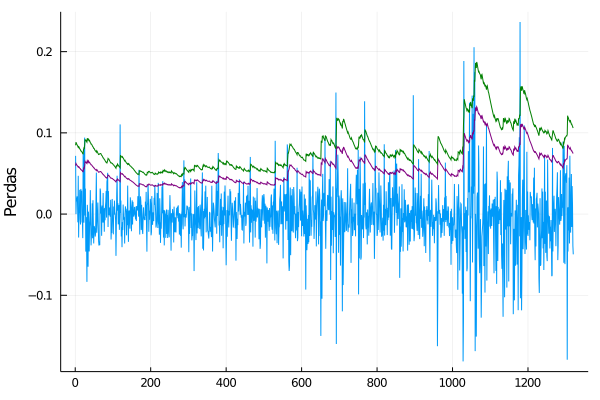

In [135]:
plot(-Tesla, legend=:none, ylabel="Perdas")
plot!(VaRs(gTesla, 0.05) * V, color=:purple)      # VaR com α = 5.0%
plot!(VaRs(gTesla, 0.01) * V, color=:green)       # VaR com α = 1.0%

### 1.6.3. Dependência não-linear

A existência de dependência não linear, em particular o fato da correlação entre séries de retornos não ser constante, sendo maior em momentos de maior turbulência do mercado, deve ser levada em conta aquando da modelização do risco de perda em portfólios.

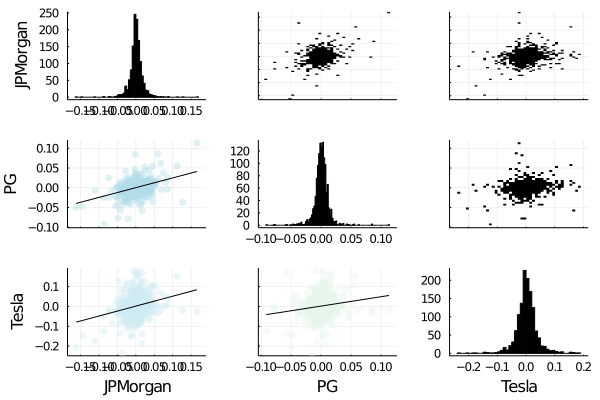

In [136]:
corrplot(hcat(JPMorgan, PG, Tesla), label=[:JPMorgan, :PG, :Tesla])

## 1.7. A experiência da banca internacional

### 1.7.1. JP Morgan 

*JPMorgan Chase utilizes VaR, a statistical risk measure, to estimate the potential loss from adverse market moves in the current market environment*. 
    
*The framework is employed across the Firm using historical simulation based on data for the previous 12 months. The framework’s approach assumes that historical changes in market values are representative of the distribution of potential outcomes in the immediate future*. 

*The Firm’s Risk Management VaR is calculated assuming a one-day holding period and an expected tail-loss methodology which approximates a 95% confidence level*.

*The Firm calculates separately a daily aggregated VaR in accordance with regulatory rules (“Regulatory VaR”), which is used to derive the Firm’s regulatory VaR-based capital requirements under Basel III. This Regulatory VaR model framework currently assumes a ten business-day holding period and an expected tail loss methodology which approximates a 99% confidence level*. 

Fonte: JP Morgan Chase & Co. 2019 Annual Report

* *Risk Management VaR*: VaR diário com nível de confiança ($1-\alpha$) = 95$\%$, calculado através de **simulação histórica** com base em dados dos últimos 12 meses
* *Regulatory VaR*: VaR quinzenal (10 dias úteis) com nível de confiança ($1-\alpha$) = 99$\%$
* *Backtesting* com base em dados históricos dos últimos 12 meses

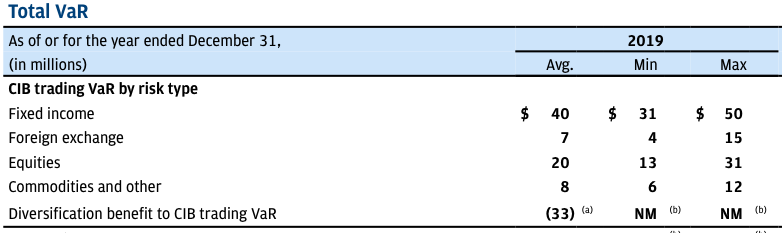
Fonte: JP Morgan Chase & Co. 2019 Annual Report

### 1.7.2. Goldman Sachs 

*We use a variety of risk measures to estimate the size of potential losses for both moderate and more extreme market moves over both short- and long-term time horizons. Our primary risk measures are VaR, which is used for shorter-term periods, and stress tests. Our risk reports detail key risks, drivers and changes for each desk and business, and are distributed daily to senior management of both our revenue-producing units and our independent risk oversight and control functions*.

*VaR is the potential loss in value due to adverse market movements over a defined time horizon with a specified confidence level. We typically employ a one-day time horizon with a 95% confidence level. We use a single VaR model, which captures risks including interest rates, equity prices, currency rates and commodity prices*.

*To comprehensively capture our exposures and relevant risks in our VaR calculation, we use historical simulations with full valuation of market factors. We sample from five years of historical data to generate the scenarios for our VaR calculation. The historical data is weighted so that the relative importance of the data reduces over time. This gives greater importance to more recent observations and reflects current asset volatilities, which improves the accuracy of our estimates of potential loss*.

*Given its reliance on historical data, VaR is most effective in estimating risk exposures in markets in which there are no sudden fundamental changes or shifts in market conditions*.

**Stress Testing**. *Stress testing is a method of determining the effect of various hypothetical stress scenarios. We use stress testing to examine risks of specific portfolios, as well as the potential impact of our significant risk exposures. We use a variety of stress testing techniques to calculate the potential loss from a wide range of market moves on our portfolios, including firmwide stress tests, sensitivity analysis and scenario analysis*.

**Backtesting**. *We perform daily backtesting of our VaR model (i.e., comparing daily net revenues for positions included in VaR to the VaR measure calculated as of the prior business day) at the firmwide level and for each of our businesses and major regulated subsidiaries*.

Fonte: The Goldman Sachs Group, Inc. 2019 Annual Report 

* *Risk Management VaR*: VaR diário com nível de confiança ($1-\alpha$) = 95\%, calculado através de **simulação histórica filtrada** com base em dados dos últimos 5 anos.
* Testes de stresse através de análise de sensibilidade e análise de cenários.
* *Backtesting* realizado diáriamente

 Média do VaR diário
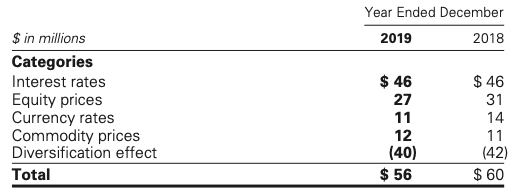
Fonte: The Goldman Sachs Group, Inc. 2019 Annual Report 

## 1.8. Teoria da carteira

### 1.8.1 Atitudes perante o risco
 * Aversão ao risco
 * Neutralidade perante o risco
 * Preferência pelo risco

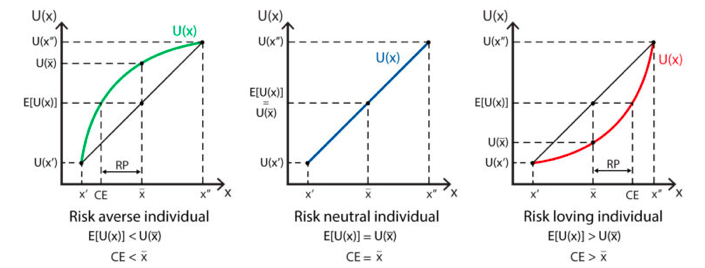

### 1.8.2  Conjunto de oportunidades de investimento

#### 1.8.2.1 Espaço valor esperado - volatilidade de retornos

As distribuições elípticas

* Normal
* T-Student

são caracterizadas completamente por uma medida de localização e uma medida de dispersão $\rightarrow$ Análise no espaço média-variância

#### 1.8.2.2 Volatilidade como operador sub-linear

O valor esperado é um operador linear: 
  \begin{equation}
  \mathbb{E}[\lambda X + (1-\lambda) Y] = \lambda \mathbb{E}[X] + (1-\lambda) \mathbb{E}[Y]
  \end{equation}


A volatilidade é um operador sub-linear
\begin{equation}
    \sigma[\lambda X + (1-\lambda) Y] \leq \lambda\, \sigma[X] + (1-\lambda)\, \sigma[Y]
    \end{equation}
    onde $\sigma[\cdot]$ denota a volatilidade dos retornos. Teremos uma relação de igualdade apenas se os retornos dos ativos X e Y estiverem perfeitamente correlacionados, $\rho(X,Y)=1$

Combinações de risco ($\sigma$) e retorno ($\mu$) para carteiras de dois ativos financeiros parametrizadas por diferentes niveis de correlação

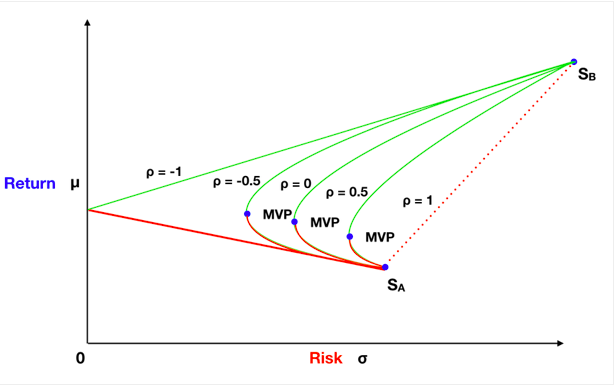

Para cada nível de correlação: (i) MVP localiza as carteiras de volatilidade/variância mínima, e (ii) as carteiras sobre a linha verde dominam as carteiras sobre a linha vermelha, pois para o mesmo risco têm superior retorno esperado.

#### 1.8.2.3 Carteira de volatilidade/variância mínima

A carteira de volatilidade/variância mínima (CVM) tem associado um nível de risco inferior ao de qualquer um dos ativos que a compõem. Quanto menor for a correlação entre os retornos dos ativos, menor será também o risco da carteira de variância mínima.  

### 1.8.3 Optimização de Carteiras

#### 1.8.3.1 Valor esperado, volatilidade e VaR da carteira

O valor esperado de uma carteira ($\mu_p$) é dado por
\begin{equation}
  \mu_p  =  \textrm{w}^\prime_p \, \mu
\end{equation}
e a volatilidade da carteira ($\sigma_p$) por, 
\begin{equation}\label{volatil}
  \sigma_p  =  \sqrt{\textrm{w}^\prime_p \,\Sigma\, \textrm{w}_p}
\end{equation}

Então, sabendo que  $\text{VaR}_\alpha^T = -z_\alpha \times \sigma_T \times V_0$, o VaR de uma carteira será dado por

\begin{equation}
\text{VaR}_\alpha^T = -z_\alpha \times \sqrt{\textrm{w}_p^\prime\, \Sigma_T\, \textrm{w}_p} \times V_0
\end{equation}

Assumindo que as condições subjacentes à agregação temporal são válidas para os retornos em análise, teremos finalmente 

\begin{equation}
  \text{VaR}_\alpha^T = -z_\alpha \times \sqrt{T} \times \sqrt{\textrm{w}_p^\prime\, \Sigma_{\text{diário}}\, \textrm{w}_p} \times  V_0 
\end{equation}

**Exemplo 11.** Pretendemos determinar o VaR **semanal** com $\alpha = 5\%$ para uma carteira de USD 2 500 000 composta em pesos iguais pelas ações da JP Morgan, Procter & Gamble e Tesla.

Consideremos primeiro a matrix com retornos da JP Morgan, Procter \& Gamble e Tesla 

In [137]:
carteira = [JPMorgan PG Tesla]   

1320×3 Matrix{Float64}:
 -0.0304955    -0.0131828    -0.0716719
  0.00172737    0.00318456    8.95537e-5
 -0.0145411    -0.00971343   -0.0198439
 -0.0412798    -0.00877232   -0.0155976
 -0.0226538    -0.0158016    -0.0217986
 -0.00152877    0.00917196   -0.0150415
  0.00220749   -0.00208895    0.010148
 -0.027861     -0.00866373   -0.0470985
  0.0148869     0.0039473     0.0288834
 -0.0201324    -0.0154835    -0.00578835
 -0.000526404   0.0230711    -0.00131803
 -0.0266634    -0.00312032   -0.029847
 -0.00469473    0.0116683     0.00637115
  ⋮                          
 -0.0120437     0.0029515    -0.0448653
  0.0102399    -0.00404107    0.0361687
  0.0163718     0.00217796   -0.0718406
 -0.0160494    -0.00537575    0.00261465
 -0.0272468     0.0168097     0.022841
 -0.0100523     0.0184191    -0.0117705
  0.00773123   -0.000301769  -0.0493588
  0.0127324     0.00691627    0.0159291
  0.0165131     0.0146509    -0.0344407
 -0.0156614     0.0155304    -0.0120653
  0.0117204    -0.015530

Podemos calcular a matriz de covariâncias ($\Sigma$)

In [138]:
Sigma = cov(carteira)               

3×3 Matrix{Float64}:
 0.000363208  8.96538e-5   0.000181118
 8.96538e-5   0.000157556  7.42504e-5
 0.000181118  7.42504e-5   0.00135939

Então,

In [139]:
alfa = 0.01
V_0 = 2_500_000
w = [1/3, 1/3, 1/3]
VaRp = - quantile(Normal(0,1), alfa) * sqrt(5 * w' * Sigma * w) * V_0
println("VaR semanal da carteira = ", round(VaRp, digits = 2))

VaR semanal da carteira = 219766.6


#### 1.8.3.2 Restrições à política de investimento da carteira

Seja $w_i$ o peso do ativo $i$ na carteira. Frequentemente assumem-se as seguintes restrições à política de investimento da carteira:

* Restrição orçamental associada à carteira estar totalmente investida: 
  \begin{equation}\label{orçamental01}
  \sum_{i=1}^n w_i = 1 
  \end{equation}
* Proibição de *short-selling*:
  \begin{equation}
    w_i \geq 0, \quad \forall_i 
  \end{equation} 

#### 1.8.3.3 Modelização de problemas de optimização

A modelização de problemas de optimização de carteiras efetua-se diretamente na aplicação $\texttt{JuMP}$. Estão disponíveis três optimisadores: $\texttt{Ipopt}$ para problemas quadráticos, convexos e não-lineares, $\texttt{Cbc}$ para problemas com variáveis discretas e $\texttt{Juniper}$ que utiliza os dois optimisadores anteriores para problemas não-lineares com variáveis discretas.

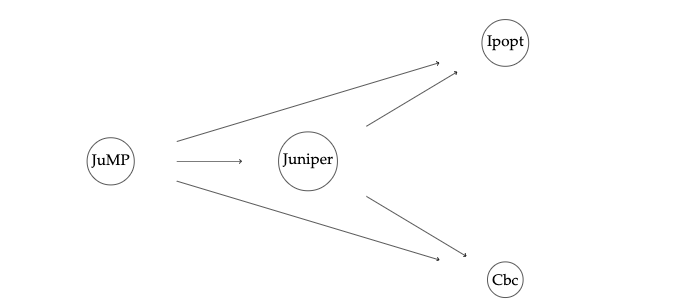

#### 1.8.3.4 Carteira de VaR mínimo

**Exemplo 12.** Consideremos a carteira do Exemplo 11, cuja política de investimento tem (i) como restrição orçamental estar sempre totalmente investida e (ii) a proibição de *short-selling*.

In [140]:
# Dados relativos às ações JP Morgan, Procter & Gamble e Tesla
alfa = 0.01
V_0 = 2_500_000
mu = [0.0002536565, 0.0000884940, 0.0004259978]   # vetor de retornos esperados
Sigma = [0.000365314  9.10981e-5   0.000186267;   # matriz de covariâncias calculada antes
         9.10981e-5   0.000158349  7.79055e-5;
         0.000186267  7.79055e-5   0.00133767]

Neste caso, iremos utilizar a aplicação de modelização de problemas de optimização $\texttt{JuMP}$ e o optimizador $\texttt{Ipopt}$

In [146]:
function cvm(Sigma)
    n = size(Sigma,1)                             # nº ações inferido pela dimensão de Sigma
    modelo = Model(Ipopt.Optimizer)               # optimizador Ipopt
    @variable(modelo, w[1:n])                     # variáveis a optimizar
    @objective(modelo, Min, w' * Sigma * w)       # minimizar variãncia = minimizar VaR
    @constraint(modelo, sum(w) == 1)              # restrição orçamental
    @constraint(modelo, w .>= 0)                  # proibição de short-selling
    optimize!(modelo)                             # optimizar!
    return value.(w)                              # pesos da carteira de VaR mínimo (CVM)
end

cvm (generic function with 1 method)

In [147]:
cvm(Sigma)

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        3
Number of nonzeros in inequality constraint Jacobian.:        3
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        3
        inequality constraints with only lower bounds:        3
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

3-element Vector{Float64}:
 0.17807902812275006
 0.7852219966169676
 0.03669897526028235

A carteira de VaR mínimo é assim composta em 17.81\% por ações da JP Morgan, em 78.52\% por ações Procter \& Gamble e apenas em 3.67\% por ações da Tesla.

Podemos também determinar a volatilidade e retorno esperado para a carteira de VaR mínimo.

In [142]:
r_CVM =  w_CVM' * mu
sigma_CVM = sqrt( w_CVM' * Sigma * w_CVM)
println("Volatilidade(CVM) = ", sigma_CVM, ", Retorno esperado(CVM) = ", r_CVM )

Volatilidade(CVM) = 0.011975879209928047, Retorno esperado(CVM) = 0.000130292021088775


#### 1.8.3.5 Fronteira eficiente

Os retornos esperados associados à fronteira eficiente estão compreendidos entre o retorno da carteira de VaR mínimo com ($r_\text{CVM}$ = 0.000130292) e o máximo dos retornos esperados dos ativos da carteira, que no caso da carteira em análise é o retorno esperado das ações da Tesla com ($r_\text{max}$ = 0.0004259978). Iremos pois definir a fronteira eficiente a partir de um conjunto de pontos sobre ela, com retornos esperados $\mu_k \in$ [0.000130292, 0.0004259978]. 

Assim para cada $\mu_k$, iremos minimizar o VaR sujeito adicionalmente à restrição do retorno da carteira não poder ser inferior a $\mu_k$. 

In [148]:
function fe(mu, Sigma, mu_k)
    modelo = Model(Ipopt.Optimizer)                  # optimizador Ipopt
    @variable(modelo, w[1:n])                        # variáveis a optimizar
    @objective(modelo, Min, w' * Sigma * w)          # minimizar variãncia = minimizar VaR
    @constraint(modelo, sum(w) == 1)                 # restrição orçamental
    @constraint(modelo, w .>= 0)                     # proibição de short-selling
    @constraint(modelo, w' * mu >= mu_k )            # <- 
    optimize!(modelo)                                # optimizar!
    return value.(w)                                 # pesos da carteira que minimiza VaR
end

fe (generic function with 1 method)

A fronteira eficiente e a carteira de VaR mínimo são apresentados na Figura seguinte, obtidas através da função,

In [ ]:
fronteira(mu, Sigma, 0.01, 5, 2_500_000)

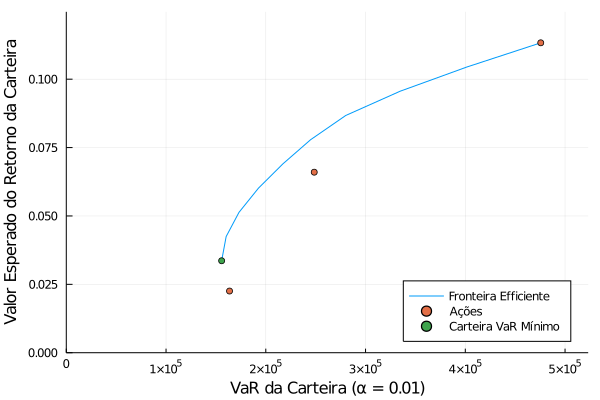

Podemos observar que as ações da JP Morgan e da Procter \& Gamble não estão sobre a fronteira eficiente, havendo composições da carteira que para o mesmo VaR dessas ações geram um retorno esperado superior. 

Na Figura seguinte é apresentada a alocação de dez carteiras idênticamente espaçadas em termos de retorno esperado ao longo da fronteira eficiente, obtida através da função,

In [ ]:
alocações(mu, Sigma, 0.01, [:JPMorgan, :PG, :Tesla])

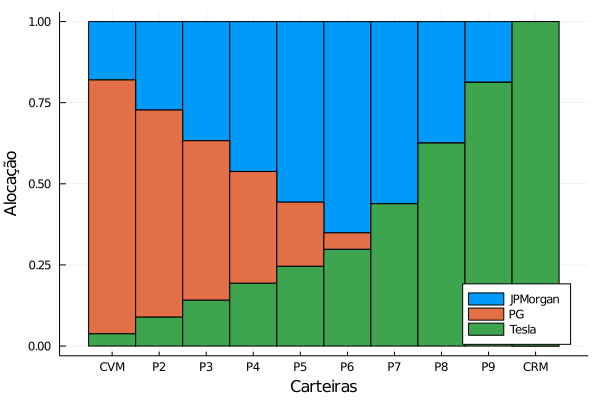

CVM denota a carteira de VaR mínimo e CRM denota a carteira de retorno máximo. Nas carteiras de menor risco de perda (CVM-P3) a Procter \& Gamble tem um peso dominante na carteira. Nas carteiras de risco de perda médio (P4-P7) a JP Morgam tem um maior peso. Finalmente, nas carteiras de maior risco de perda (P8-CRM) a Tesla tem maior peso, constituindo a totalidade da carteira quando o retorno esperado é máximo.  

### 1.8.4 Diversificação

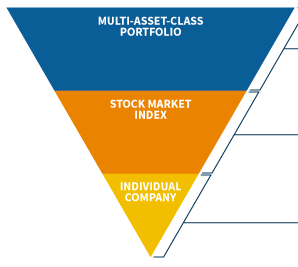

O VaR da carteira calculado como sendo a soma dos VaR individuais é designado por **VaR não diversificado**. 

Nos relatórios da JP Morgan e da Goldman Sachs podemos observar os benefícios da diversificação multi-ativos em termos de VaR comparando o VaR não diversificado com o VaR associado  à carteira global desses bancos. 

VaR (USD $1.0 \times 10^6$)         |       JP Morgan  |   Goldman Sachs
----------------------------|--------------------|--------------------
VaR diário não diversificado  |           75      |        96
VaR diário global             |           42      |        56
Benefício da diversificação multi-ativos  |           (33)      |        (40)

O benefício da diversificação por multi-ativo é bastante significativo. 

O VaR de uma carteira só será igual à soma dos VaR dos ativos constituintes dessa carteira apenas no caso em que os coeficientes de correlação dos retornos desses ativos forem todos iguais a um.

## 1.9. Risco sistemático, risco específico e retorno esperado

### 1.9.1. Risco sistemático e risco específico

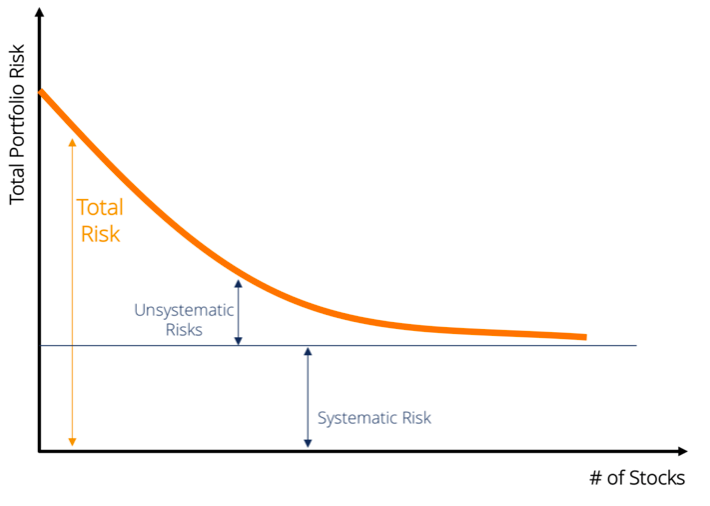

Risco Total = Risco Sistemático + Risco específico (ou não sistemático)

### 1.9.2 Fatores de risco

Fatores Risco Sistemático
* $\Delta %$ PIB
* Taxa de desemprego
* Taxas de juro
* Taxas de câmbio
* Fiscalidade
* Legislação laboral

Fatores Risco Específico
* Atributos associados à capacidade de gestão de uma empresa

### 1.9.3 Riscos Compensados

* Risco sistemático é compensado, pois não pode ser diversificado
* Risco específico **não é compensado**, pois pode ser diversificado

**Exemplo 13.** O ativo A tem risco total = 0.25 e risco sistemático = 0.15. O ativo B tem risco total = 0.40 e risco sistemático = 0.00. 
* Qual o ativo que terá o retorno esperado mais elevado?
* Qual será o retorno esperado do ativo B?

### 1.9.4 CAPM
* Apenas um fator de risco: $\mathbb{E}[r_m]-r_f$,  o prémio de risco do mercado
* Relação linear
$$\mathbb{E}[r_i]-r_f = \beta_i (\mathbb{E}[r_m]-r_f)$$

O beta é um índice de risco sistemático

#### 1.9.4.1 Calculando o beta

$$\beta_i = \frac{\sigma_i}{\sigma_m}\rho_{i,m}$$

#### 1.9.4.2 Estimando o beta

#### 1.9.4.3 Distribuição seccional dos betas
Setores tipicamente com beta baixo:

* Mineralização
* Bebidas
* Alimentação
* Farmacêuticas

### 1.9.5 Modelos de equilíbrio multi-fatores

Prémio de Risco é função de fatores de risco sistemático
$$ \mathbb{E}[r_i]-r_f = f_i(F_1, F_2,\cdots, F_n, r_f)\quad F_1,F_2,\cdots \text{fatores de risco}$$

### 1.10. Supervisão sobre Risco Financeiro

#### 1.10.1. Basileia III/IV

Basileia III define um rácio de solvabilidade, ou de requerimento de capital, que os bancos devem satisfazer, ponderando o montante de capital próprio ordinário mais resultados retidos (*common equity Tier 1* (CET1)) e o montante de ativos ponderados pelo risco (*risk-weighted assets* (RWA)), tal que,

<p style="text-align: center;"> $\text{Rácio Solvabilidade:}\quad  \frac{\text{Capital Próprio Ordinário Tier 1}}{\text{Ativos Ponderados pelo Risco}} \geq 7.0\%$<p>

O montante de ativos ponderados pelo risco é determinado pela medição da exposição aos riscos de mercado, de crédito e risco operacional. A medição do risco de mercado é efetuada fundamentalmente através da determinação do VaR e ETL para as posições detidas. Relativamente ao risco de crédito, os bancos poderão seguir três abordagens distintas para determinar o montante de ativos ponderados pelo risco: 
* Abordagem **standard**, com utilização de ratings externos, 
* Abordagem **fundação**, baseada em ratings internos (*Foundation-IRB*) para a probabilidade de incumprimento 
* Abordagem **avançada**, baseada em ratings internos (*Advanced-IRB*) para a probabilidade de incumprimento, perda dado incumprimento e exposição aquando incumprimento.

Basilia III define adicionalmente um amortecedor anti-cíclico discricionário, permitindo que supervisores nacionais exijam até adicioanis 2.5% do montante de ativos poderados pelo risco RWA em capital próprio ordinario Tier 1 durante períodos de elevado crescimento do crédito. 

Basileia III introduz também um rácio de alavancamento mínimo, o qual não leva em conta a ponderações dos ativos pelo risco, considerando antes a soma da exposição de todos os ativos e rúbricas fora do balanço

<p style="text-align: center;"> $\text{Rácio Alavancamento:}\quad  \frac{\text{Capital Próprio Ordinário Tier 1}}{\text{Média Ativo Total Consolidado}} \geq 3.0\%$<p>

Finalmente, Basileia III introduz também dois rácios de liquidez,

<p style="text-align: center;"> $\text{Rácio Cobertura de Liquidez (LCR):}\quad  \frac{\text{Ativos líquidos de qualidade elevada}}{\text{Total de net outflows de liquidez por 30 dias}} \geq 100\%$<p>

<p style="text-align: center;"> $\text{Rácio de Financiamento Líquido Estável (NSFR):}\quad  \frac{\text{Montante disponível de fundos estáveis}}{\text{Montante requerido de fundos estáveis}} \geq 100\%$<p>

Os termos de Basileia IV foram acordados em 2017 e devem ser implementados em Janeiro de 2023. As principais alterações residem (i) na definição de um limite inferior ao requerimento de capital de modo que este seja sempre pelo menos 72.5% do requerimento determinado pela abordagem *standard*, (ii) maior precisão na fronteira entre o *trading book* representando os ativos detidos para negociação e o *banking book* representando os ativos que se espera serem detidos até à maturidade, como os empréstimos a clientes.

#### 1.10.2. Solvência II

#### 1.10.3. IFRS9 e CECL